In [1]:
from lgca import get_lgca

In [3]:
# geometry
K = 8
b = 4
geom = 'square'
restchannels = K-b

# model parameters
r_d = 0.01
r_b = 0.2
kappa = -5
theta = 0.8

# simulation parameters
dims = (1,1)
dens = 0.2 #starting condition
time = 500

lgca = get_lgca(interaction='go_or_grow', bc='periodic', density=dens, geometry=geom, dims=dims, restchannels=restchannels, 
                r_d=r_d, r_b=r_b, kappa=kappa, theta=theta)

In [4]:
lgca.timeevo(time)

Progress: [####################] 100% Done...


In [5]:
lgca.dens_t

array([[[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[2.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[4.]],

       [[4.]],

       [[4.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[2.]],

       [[2.]],

       [[1.]],

       [[1.]],

       [[2.]],

       [[2.]],

       [[4.]],

       [[4.]],

       [[4.]],

       [[4.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[4.]],

       [[4.]],

       [[4.]],

       [[4.]],

       [[4.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [[3.]],

       [

In [1]:
import numpy as np
import pandas as pd

In [17]:
df = pd.read_stata('._EER_2849_data.dta')

ValueError: Version of given Stata file is 0. pandas supports importing versions 105, 108, 111 (Stata 7SE), 113 (Stata 8/9), 114 (Stata 10/11), 115 (Stata 12), 117 (Stata 13), 118 (Stata 14/15/16),and 119 (Stata 15/16, over 32,767 variables).

In [5]:
df.head()

,ccode,iso,year,govvote,oppvote,frac,partycount,right,left,extr,...,pk_fin,pk_norm,pk_dis,cpi,govcris,turnover,vetopl,dict,election,election_year
0,1.0,AUS,1870-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,1.0,AUS,1871-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,1.0,AUS,1872-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,1.0,AUS,1873-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,1.0,AUS,1874-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN


<AxesSubplot:xlabel='year'>

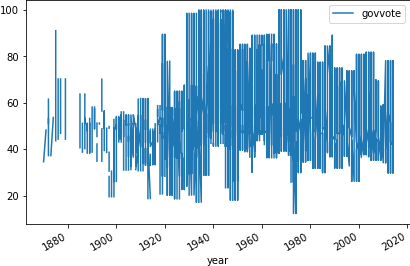

In [11]:
df.plot(x='year', y='govvote')

In [16]:
df.to_csv('._EER_2849_data.csv')
df.to_excel('._EER_2849_data.xlsx')